In [19]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  


In [20]:
## preprocessing
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
## performing pca
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

In [15]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

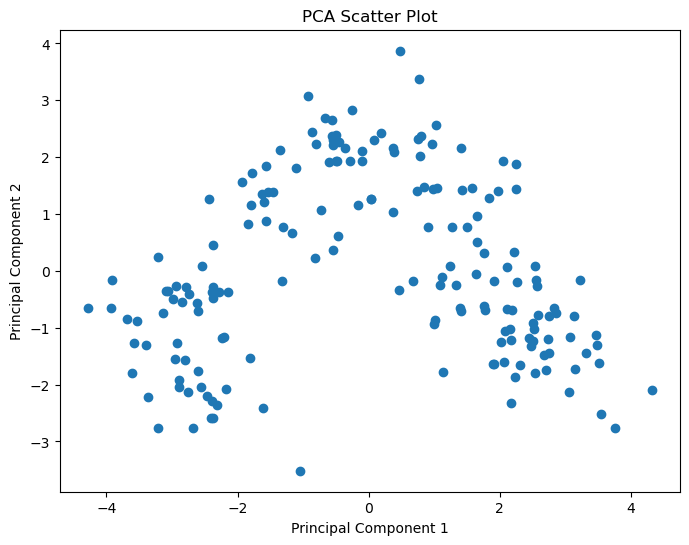

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

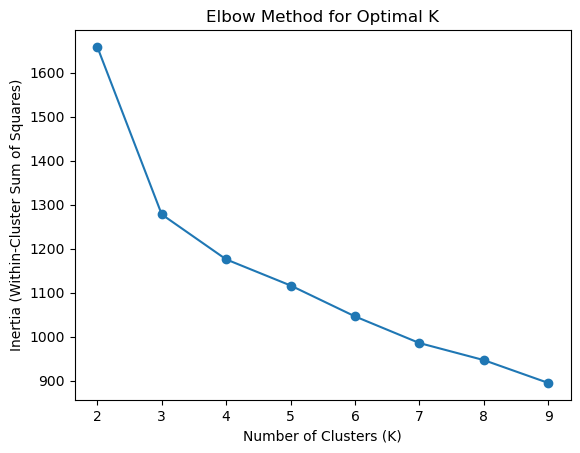

In [29]:
# Determine the optimal number of clusters (K)
k_values = range(2, 10)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to determine K
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow method, choose the optimal K and perform clustering
optimal_k = 3  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_
